In [1]:
%pip install medviz

                                              0.0/47.1 kB ? eta -:--:--
     ---------------------------------------- 47.1/47.1 kB 2.3 MB/s eta 0:00:00
                                              0.0/1.7 MB ? eta -:--:--
     --------                                 0.4/1.7 MB 7.4 MB/s eta 0:00:01
     ---------------------------------------  1.7/1.7 MB 18.2 MB/s eta 0:00:01
     ---------------------------------------- 1.7/1.7 MB 18.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
from PIL import Image
import SimpleITK as sitk
def visualizeAsGif(mainimg:str,savedir:str,segimg:str = None,name:str="array.gif",gndtrth:str=None, speed=50):
    r = sitk.ImageFileReader()
    r.SetFileName(mainimg)
    main = r.Execute()
    main = sitk.GetArrayFromImage(main)

    main = main/main.max()
    main  = main *255
    
    imgs = np.uint8(main)
    imgs = [Image.fromarray(img, 'L').convert("RGBA") for img in imgs]

    red = (255,0,0,255) #missed i.e., FN

    blue = (0,0,255,255) #wrong ID i.e., FP

    green = (0,255,0,255) #Overlap
    clear = (0,0,0,0)

    if not segimg == None:
        
        r.SetFileName(segimg)
        seg = r.Execute()
        seg = sitk.GetArrayFromImage(seg)
        seg = seg *255
        segs = np.uint8(seg)
        segs = [Image.fromarray(img, 'L') for img in segs]
        segs = [seg.convert("RGBA") for seg in segs]
        datas = [seg.getdata() for seg in segs]

        
        count = 0
        for data in datas:
            newData=[]
            for item in data:
                
                if item[0] == 0 and item[1] == 0 and item[2] == 0:
                    newData.append(clear)
                else:
                    newData.append(green)
            segs[count].putdata(newData)
            count += 1

        if not gndtrth==None:
            datas = [seg.getdata() for seg in segs]

            r.SetFileName(gndtrth)
            gs = r.Execute()
            gs = sitk.GetArrayFromImage(gs)
            gs = gs *255
            gs = np.uint8(gs)
            gs = [Image.fromarray(g, 'L') for g in gs]
            gs = [g.convert("RGBA") for g in gs]
            gdatas = [g.getdata() for g in gs]    

            for j in range(0,len(datas)):
                data = datas[j]
                gdata = gdatas[j]
                
                newData=[]
                for i in range(0,len(data)):
                    item = data[i]
                    gitem = gdata[i]
                    if item[0] == green[0] and item[1] == green[1] and item[2] == green[2]:
                        if gitem[0] != 0 and gitem[1] != 0 and gitem[2] != 0:
                            newData.append(green)
                        else:
                            newData.append(blue)
                    else:
                        if gitem[0] != 0 and gitem[1] != 0 and gitem[2] != 0:
                            newData.append(red)
                        else:
                            newData.append(clear)
                
                segs[j].putdata(newData)
                

        for i in range(0,len(imgs)):
            imgs[i].paste(segs[i],(0,0),segs[i])

        

    # duration is the number of milliseconds between frames; this is 40 frames per second
    imgs[0].save(savedir+"/"+name, save_all=True, append_images=imgs[1:], duration=speed, loop=0)


In [83]:
spd = 100

visualizeAsGif(r"G:\Shared drives\INVent\mfk58\ImageProcessing\FilteredCropped\holdoutSet\CCF_014_0000.mha",r"G:\Shared drives\INVent\mfk58\visualizations",
                name="CCF_014.gif", speed=spd)

visualizeAsGif(r"G:\Shared drives\INVent\mfk58\ImageProcessing\FilteredCropped\holdoutSet\CCF_014_0000.mha",r"G:\Shared drives\INVent\mfk58\visualizations",
                segimg=r"G:\Shared drives\INVent\mfk58\Outputs\externalcomplete\CCF_014.mha" ,name="CCF_014_output.gif", speed=spd)

visualizeAsGif(r"G:\Shared drives\INVent\mfk58\ImageProcessing\FilteredCropped\holdoutSet\CCF_014_0000.mha",r"G:\Shared drives\INVent\mfk58\visualizations",
                segimg=r"G:\Shared drives\INVent\mfk58\ImageProcessing\FilteredCropped\holdoutLabels\CCF_014.mha" ,name="CCF_014_gndtrth.gif", speed=spd)

visualizeAsGif(r"G:\Shared drives\INVent\mfk58\ImageProcessing\FilteredCropped\holdoutSet\CCF_014_0000.mha",r"G:\Shared drives\INVent\mfk58\visualizations",
                segimg=r"G:\Shared drives\INVent\mfk58\Outputs\externalcomplete\CCF_014.mha",name="CCF_014_combined.gif",
                gndtrth=r"G:\Shared drives\INVent\mfk58\ImageProcessing\FilteredCropped\holdoutLabels\CCF_014.mha", speed=spd)

In [86]:
import os
def visualizeFromexternalcomplete(fileID:str ="CCF_014"):
    spd = 100
    if not os.path.isdir(r"G:\Shared drives\INVent\mfk58\visualizations\{}".format(fileID)):
        os.mkdir(r"G:\Shared drives\INVent\mfk58\visualizations\{}".format(fileID))

    visualizeAsGif(r"G:\Shared drives\INVent\mfk58\ImageProcessing\FilteredCropped\holdoutSet\{}_0000.mha".format(fileID),r"G:\Shared drives\INVent\mfk58\visualizations\{}".format(fileID),
                name="{}.gif".format(fileID), speed=spd)

    visualizeAsGif(r"G:\Shared drives\INVent\mfk58\ImageProcessing\FilteredCropped\holdoutSet\{}_0000.mha".format(fileID),r"G:\Shared drives\INVent\mfk58\visualizations\{}".format(fileID),
                segimg=r"G:\Shared drives\INVent\mfk58\Outputs\externalcomplete\{}.mha".format(fileID) ,name="{}_output.gif".format(fileID), speed=spd)

    visualizeAsGif(r"G:\Shared drives\INVent\mfk58\ImageProcessing\FilteredCropped\holdoutSet\{}_0000.mha".format(fileID),r"G:\Shared drives\INVent\mfk58\visualizations\{}".format(fileID),
                segimg=r"G:\Shared drives\INVent\mfk58\ImageProcessing\FilteredCropped\holdoutLabels\{}.mha".format(fileID) ,name="{}_gndtrth.gif".format(fileID), speed=spd)

    visualizeAsGif(r"G:\Shared drives\INVent\mfk58\ImageProcessing\FilteredCropped\holdoutSet\{}_0000.mha".format(fileID),r"G:\Shared drives\INVent\mfk58\visualizations\{}".format(fileID),
                segimg=r"G:\Shared drives\INVent\mfk58\Outputs\externalcomplete\{}.mha".format(fileID),name="{}_combined.gif".format(fileID),
                gndtrth=r"G:\Shared drives\INVent\mfk58\ImageProcessing\FilteredCropped\holdoutLabels\{}.mha".format(fileID), speed=spd)


In [90]:
import glob

for file in glob.glob(r"G:\Shared drives\INVent\mfk58\Outputs\externalcomplete\*.mha"):
    s = file.replace(r"G:\Shared drives\INVent\mfk58\Outputs\externalcomplete","").replace("\\","").replace(".mha","")
    visualizeFromexternalcomplete(fileID=s)

In [3]:
import numpy as np
from PIL import Image
import SimpleITK as sitk
from PIL import ImageFilter, ImageOps

def hasColor(img)->bool:
    img = ImageOps.grayscale(img)
    img = np.array(img)
    return img.max() > 0

def visualizeAsGifBoundary(mainimg:str,savedir:str,segimg:str = None,name:str="array.gif",gndtrth:str=None, speed=50, crop:bool=True):
    r = sitk.ImageFileReader()
    r.SetFileName(mainimg)
    main = r.Execute()
    main = sitk.GetArrayFromImage(main)

    main = main/main.max()
    main  = main *255
    
    imgs = np.uint8(main)
    imgs = [Image.fromarray(img, 'L').convert("RGBA") for img in imgs]

    red = (255,0,0,255) #missed i.e., FN

    blue = (0,0,255,255) #wrong ID i.e., FP

    green = (0,255,0,255) #Overlap
    purple = (255,0,255,255)
    clear = (0,0,0,0)
    
    first = 10000000000
    last = 0

    if not segimg == None:
        
        r.SetFileName(segimg)
        seg = r.Execute()
        seg = sitk.GetArrayFromImage(seg)
        seg = seg *255
        segs = np.uint8(seg)
        segs = [Image.fromarray(img, 'L').filter(ImageFilter.FIND_EDGES) for img in segs]
        segs = [seg.convert("RGBA") for seg in segs]
        datas = [seg.getdata() for seg in segs]

        
        count = 0
        for data in datas:
            newData=[]
            for item in data:
                
                if item[0] == 0 and item[1] == 0 and item[2] == 0:
                    newData.append(clear)
                else:
                    newData.append(green)
            segs[count].putdata(newData)
            count += 1

        if not gndtrth==None:
            datas = [seg.getdata() for seg in segs]

            r.SetFileName(gndtrth)
            gs = r.Execute()
            gs = sitk.GetArrayFromImage(gs)
            gs = gs *255
            gs = np.uint8(gs)
            gs = [Image.fromarray(g, 'L').filter(ImageFilter.FIND_EDGES) for g in gs]
            gs = [g.convert("RGBA") for g in gs]
            gdatas = [g.getdata() for g in gs]    

            for j in range(0,len(datas)):
                data = datas[j]
                gdata = gdatas[j]
                
                newData=[]
                for i in range(0,len(data)):
                    item = data[i]
                    gitem = gdata[i]
                    if item[0] == 0 and item[1] == 0 and item[2] == 0 and gitem[0] == 0 and gitem[1] == 0 and gitem[2] == 0:
                        newData.append(clear)
                    else:
                        if item[1] != 0 and gitem[1]!=0:
                            newData.append(purple)
                        else:
                            if item[1] !=0:
                                newData.append(blue)
                            else:
                                newData.append(red)
                
                segs[j].putdata(newData)
                
        
        for i in range(0,len(imgs)):
            imgs[i].paste(segs[i],(0,0),segs[i])
            if hasColor(segs[i]):
                first = i if i < first else first
                last = i if i > last else last

    first = first - 5 if (first-5 > 0) else 0
    last = last + 5 if (last+5 < len(imgs)) else len(imgs)
        
    if crop:
        imgs[first].save(savedir+"/BOUNDARY"+name, save_all=True, append_images=imgs[first+1:last], duration=speed, loop=0)
    else:
    # duration is the number of milliseconds between frames; this is 40 frames per second
        imgs[0].save(savedir+"/BOUNDARY"+name, save_all=True, append_images=imgs[1:], duration=speed, loop=0)


In [41]:
import os
def visualizeFromexternalcompleteBoundary(fileID:str ="CCF_014"):
    spd = 150
    if not os.path.isdir(r"G:\Shared drives\INVent\mfk58\visualizations\{}".format(fileID)):
        os.mkdir(r"G:\Shared drives\INVent\mfk58\visualizations\{}".format(fileID))

    visualizeAsGifBoundary(r"G:\Shared drives\INVent\mfk58\ImageProcessing\FilteredCropped\holdoutSet\{}_0000.mha".format(fileID),r"G:\Shared drives\INVent\mfk58\visualizations\{}".format(fileID),
                segimg=r"G:\Shared drives\INVent\mfk58\Outputs\externalcomplete\{}.mha".format(fileID) ,name="{}_output.gif".format(fileID), speed=spd)

    visualizeAsGifBoundary(r"G:\Shared drives\INVent\mfk58\ImageProcessing\FilteredCropped\holdoutSet\{}_0000.mha".format(fileID),r"G:\Shared drives\INVent\mfk58\visualizations\{}".format(fileID),
                segimg=r"G:\Shared drives\INVent\mfk58\ImageProcessing\FilteredCropped\holdoutLabels\{}.mha".format(fileID) ,name="{}_gndtrth.gif".format(fileID), speed=spd)

    visualizeAsGifBoundary(r"G:\Shared drives\INVent\mfk58\ImageProcessing\FilteredCropped\holdoutSet\{}_0000.mha".format(fileID),r"G:\Shared drives\INVent\mfk58\visualizations\{}".format(fileID),
                segimg=r"G:\Shared drives\INVent\mfk58\Outputs\externalcomplete\{}.mha".format(fileID),name="{}_combined.gif".format(fileID),
                gndtrth=r"G:\Shared drives\INVent\mfk58\ImageProcessing\FilteredCropped\holdoutLabels\{}.mha".format(fileID), speed=spd)

visualizeFromexternalcompleteBoundary()


76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122


In [42]:
import glob

for file in glob.glob(r"G:\Shared drives\INVent\mfk58\Outputs\externalcomplete\*.mha"):
    s = file.replace(r"G:\Shared drives\INVent\mfk58\Outputs\externalcomplete","").replace("\\","").replace(".mha","")
    visualizeFromexternalcompleteBoundary(fileID=s)

46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
5

In [1]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


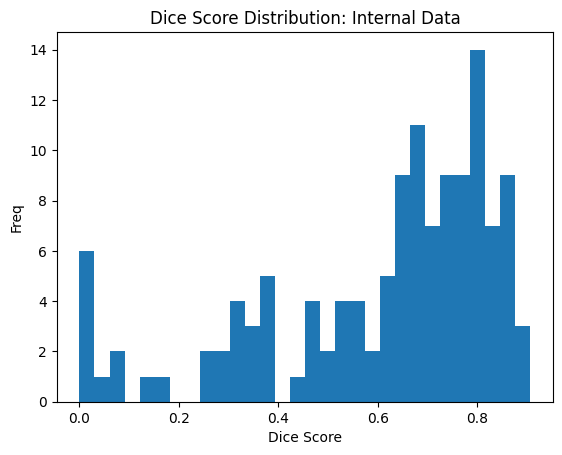

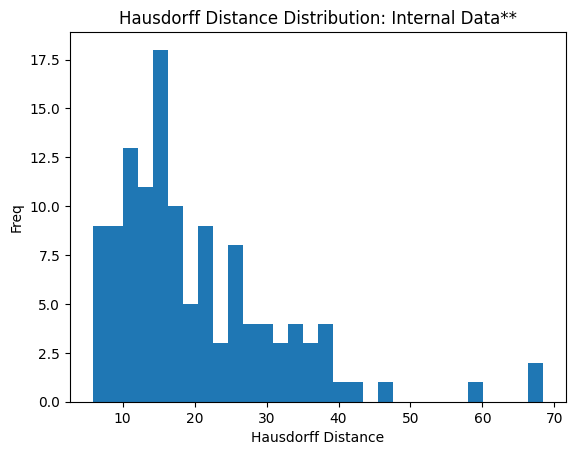

In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv(r"G:\Shared drives\INVent\mfk58\Outputs\outputs_INTcompletePP.csv").loc[:,"dice"]
data = data.to_list()
vals = [0.794426359, 0.772614083, 0.750847764, 0.674252298, 0.668530595, 0.76512611, 0.771340095, 0.803153457, 0.824248975, 0.840608117]
plt.hist(data,30)
plt.title('Dice Score Distribution: Internal Data')
plt.xlabel('Dice Score')
plt.ylabel('Freq')
plt.show()

data = pd.read_csv(r"G:\Shared drives\INVent\mfk58\Outputs\outputs_INTcompletePPNo0.csv").loc[:,"hd"]
data = data.to_list()
plt.hist(data,30)
plt.title('Hausdorff Distance Distribution: Internal Data**')
plt.xlabel('Hausdorff Distance')
plt.ylabel('Freq')
plt.show()

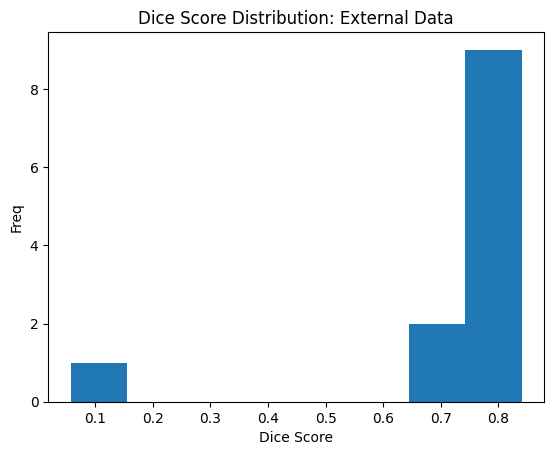

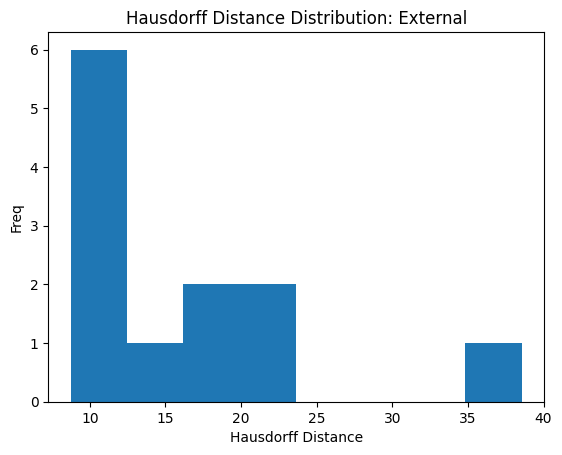

In [18]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv(r"G:\Shared drives\INVent\mfk58\Outputs\outputs_completePP.csv").loc[:,"dice"]
data = data.to_list()
vals = [0.794426359, 0.772614083, 0.750847764, 0.674252298, 0.668530595, 0.76512611, 0.771340095, 0.803153457, 0.824248975, 0.840608117]
plt.hist(data,8)
plt.title('Dice Score Distribution: External Data')
plt.xlabel('Dice Score')
plt.ylabel('Freq')
plt.show()

data = pd.read_csv(r"G:\Shared drives\INVent\mfk58\Outputs\outputs_completePP.csv").loc[:,"hd"]
data = data.to_list()
plt.hist(data,8)
plt.title('Hausdorff Distance Distribution: External')
plt.xlabel('Hausdorff Distance')
plt.ylabel('Freq')
plt.show()

In [11]:
import os
def visualizeFromInternalBoundary(fileID:str ="CCF_001",nomask:bool = False):
    spd = 150
    if not os.path.isdir(r"G:\Shared drives\INVent\mfk58\visualizations\internal\{}".format(fileID)):
        os.mkdir(r"G:\Shared drives\INVent\mfk58\visualizations\internal\{}".format(fileID))

    if nomask:
        visualizeAsGif(r"G:\Shared drives\INVent\mfk58\ImageProcessing\FilteredCropped\trainingSet\{}_0000.mha".format(fileID),r"G:\Shared drives\INVent\mfk58\visualizations\internal\{}".format(fileID),
                name="{}.gif".format(fileID), speed=spd)
        return

    visualizeAsGifBoundary(r"G:\Shared drives\INVent\mfk58\ImageProcessing\FilteredCropped\trainingSet\{}_0000.mha".format(fileID),r"G:\Shared drives\INVent\mfk58\visualizations\internal\{}".format(fileID),
                segimg=r"G:\Shared drives\INVent\mfk58\Outputs\internalcompletePP\{}.mha".format(fileID) ,name="{}_output.gif".format(fileID), speed=spd)

    visualizeAsGifBoundary(r"G:\Shared drives\INVent\mfk58\ImageProcessing\FilteredCropped\trainingSet\{}_0000.mha".format(fileID),r"G:\Shared drives\INVent\mfk58\visualizations\internal\{}".format(fileID),
                segimg=r"G:\Shared drives\INVent\mfk58\ImageProcessing\FilteredCropped\trainingLabels\{}.mha".format(fileID) ,name="{}_gndtrth.gif".format(fileID), speed=spd)

    visualizeAsGifBoundary(r"G:\Shared drives\INVent\mfk58\ImageProcessing\FilteredCropped\trainingSet\{}_0000.mha".format(fileID),r"G:\Shared drives\INVent\mfk58\visualizations\internal\{}".format(fileID),
                segimg=r"G:\Shared drives\INVent\mfk58\Outputs\internalcompletePP\{}.mha".format(fileID),name="{}_combined.gif".format(fileID),
                gndtrth=r"G:\Shared drives\INVent\mfk58\ImageProcessing\FilteredCropped\trainingLabels\{}.mha".format(fileID), speed=spd)





In [15]:
import glob
nomask = ["CCF_011","CCF_027","CCF_025","UH_045"]
for file in glob.glob(r"G:\Shared drives\INVent\mfk58\Outputs\internalcompletePP\*.mha"):
    
    s = file.replace(r"G:\Shared drives\INVent\mfk58\Outputs\internalcompletePP","").replace("\\","").replace(".mha","")
    if s in nomask:
        visualizeFromInternalBoundary(fileID=s,nomask=True)
    else:
        visualizeFromInternalBoundary(fileID=s)


ValueError: data type <class 'numpy.int16'> not inexact

In [19]:
visualizeFromInternalBoundary("UH_173")
visualizeFromInternalBoundary("UH_174")

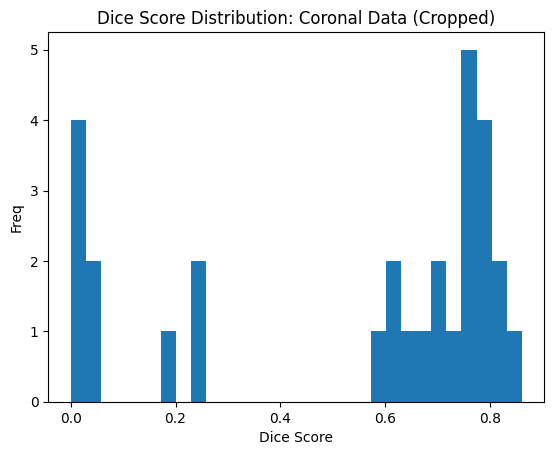

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


data = pd.read_csv(r"G:\Shared drives\INVent\mfk58\Outputs\coronalv2.csv").loc[:,"dice"]
data = data.to_list()
plt.hist(data,30)
plt.title('Dice Score Distribution: Coronal Data (Cropped)')
plt.xlabel('Dice Score')
plt.ylabel('Freq')
plt.show()


In [4]:

spd = 150

import os
import glob
nomask = []
for file in glob.glob(r"G:\Shared drives\INVent\mfk58\Outputs\coronalv2.5\*.mha"):
    fileID = file.replace(r"G:\Shared drives\INVent\mfk58\Outputs\coronalv2.5","").replace("\\","").replace(".mha","")
    if not os.path.isdir(r"G:\Shared drives\INVent\mfk58\visualizations\coronalsv2.5\{}".format(fileID)):
        os.mkdir(r"G:\Shared drives\INVent\mfk58\visualizations\coronalsv2.5\{}".format(fileID))
    if fileID in nomask:
        continue
    else:
        visualizeAsGifBoundary(r"G:\Shared drives\INVent\mfk58\Outputs\coronalv2.5\Images\{}_0000.mha".format(fileID),r"G:\Shared drives\INVent\mfk58\visualizations\coronalsv2.5\{}".format(fileID),
                segimg=r"G:\Shared drives\INVent\mfk58\Outputs\coronalv2.5\{}.mha".format(fileID),name="{}_combined.gif".format(fileID),
                gndtrth=r"G:\Shared drives\INVent\mfk58\Outputs\coronalv2.5\GroundTruths\{}.mha".format(fileID), speed=spd)

    


    

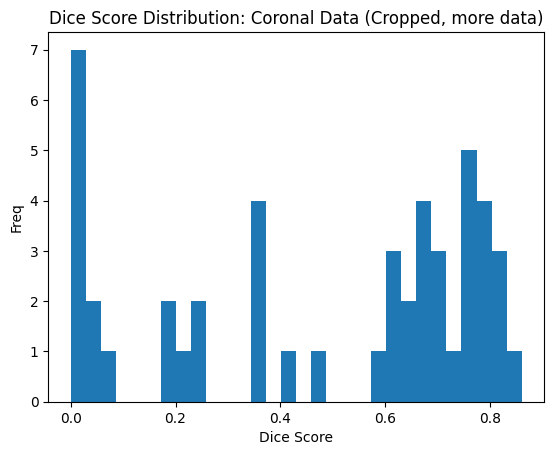

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_excel(r"G:\Shared drives\INVent\mfk58\Outputs\coronalv2&v2.5.xlsx").loc[:,"dice"]
data = data.to_list()
plt.hist(data,30)
plt.title('Dice Score Distribution: Coronal Data (Cropped, more data)')
plt.xlabel('Dice Score')
plt.ylabel('Freq')
plt.show()

C:\Users\theev\AppData\Local\Temp\ipykernel_31192\1449499860.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_yticklabels(['{:,.2%}'.format(x) for x in vals])


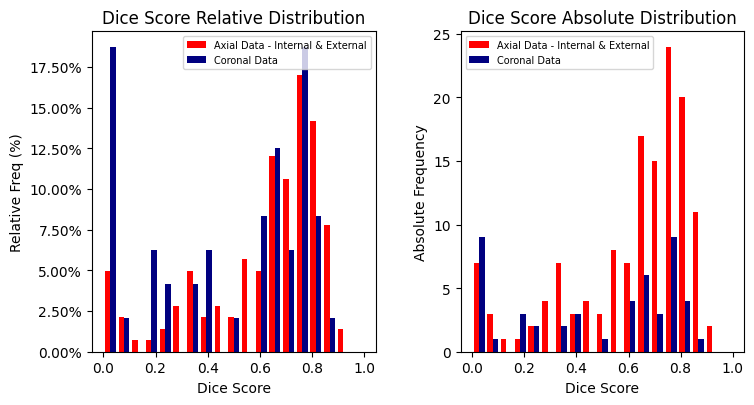

In [78]:
#%%
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fig, (ax0,ax1) = plt.subplots(nrows=1, ncols=2)

adata = pd.read_csv(r"G:\Shared drives\INVent\mfk58\Outputs\AA-Old statistics\outputs_INTcompletePP.csv").loc[:,"dice"].to_list()
t = pd.read_csv(r"G:\Shared drives\INVent\mfk58\Outputs\AA-Old statistics\outputs_completePP.csv").loc[:,"dice"].to_list()
for v in t:
    adata.append(v)
adata - pd.Series(adata)
cdata = pd.read_excel(r"G:\Shared drives\INVent\mfk58\Outputs\coronalv2&v2.5.xlsx").loc[:,"dice"]

colors = ['red','navy']
labels = ['Axial Data - Internal & External','Coronal Data']

bins = np.linspace(0, 1, 20)
w = [np.ones_like(adata) / len(adata), np.ones_like(cdata) / len(cdata)]
ax0.hist([adata,cdata], bins,color=colors,label=labels,histtype='bar',weights= w)
#plt.hist(cdata,bins,alpha=0.5,label=labels[1],histtype='bar')
ax0.set_title('Dice Score Relative Distribution')
ax0.set_xlabel('Dice Score')
ax0.set_ylabel('Relative Freq (%)')
vals = ax0.get_yticks()
ax0.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
ax0.legend(prop={'size':7})

ax1.hist([adata,cdata], bins,color=colors,label=labels,histtype='bar')
ax1.set_title('Dice Score Absolute Distribution')
ax1.set_xlabel('Dice Score')
ax1.set_ylabel('Absolute Frequency')
ax1.legend(prop={'size':7})



fig.tight_layout()
fig.set_size_inches(8,4)
plt.savefig(r"G:\Shared drives\INVent\mfk58\plots\fig.png")
